In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
687,1,107,50,19,0,28.3,0.181,29,0
392,1,131,64,14,415,23.7,0.389,21,0
364,4,147,74,25,293,34.9,0.385,30,0
46,1,146,56,0,0,29.7,0.564,29,0
556,1,97,70,40,0,38.1,0.218,30,0
276,7,106,60,24,0,26.5,0.296,29,1
39,4,111,72,47,207,37.1,1.390,56,1
317,3,182,74,0,0,30.5,0.345,29,1
653,2,120,54,0,0,26.8,0.455,27,0
429,1,95,82,25,180,35.0,0.233,43,1


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes.shape

(768, 9)

In [12]:
diabetes=diabetes.drop_duplicates()

In [13]:
diabetes.shape

(768, 9)

In [14]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
print('No. of zero values in Glucose',diabetes[diabetes['Glucose']==0].shape[0])
print('No. of zero values in Blood Pressure',diabetes[diabetes['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness' ,diabetes[diabetes['SkinThickness']==0].shape[0])
print('No. of zero values in Insulin' ,diabetes[diabetes['Insulin']==0].shape[0])
print('No. of zero values in BMI',diabetes[diabetes['BMI']==0].shape[0])

No. of zero values in Glucose 5
No. of zero values in Blood Pressure 35
No. of zero values in SkinThickness 227
No. of zero values in Insulin 374
No. of zero values in BMI 11


In [17]:
diabetes['Glucose']=diabetes['Glucose'].replace(0, diabetes['Glucose'].mean()) 
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].mean()) 
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean()) 
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean()) 
diabetes['BMI']=diabetes['BMI'].replace(0, diabetes['BMI'].mean())

In [18]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Negative (0): 500
Positive (1): 268


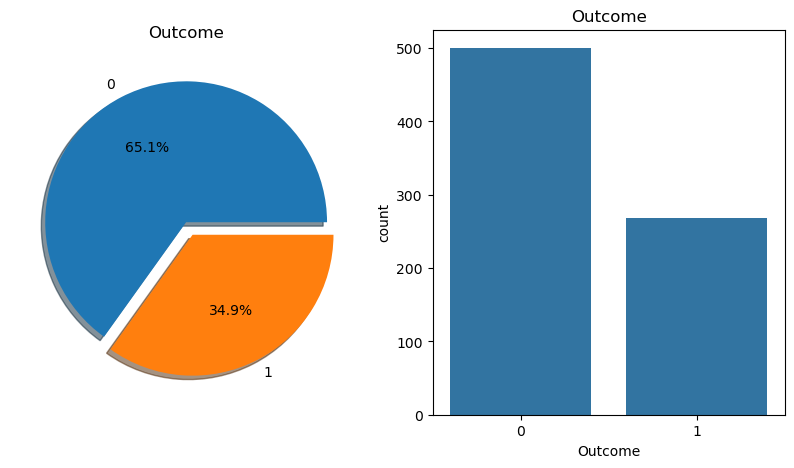

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
diagnosis_counts = diabetes['Outcome'].value_counts()
diagnosis_counts.plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=diabetes, ax=ax[1])
ax[1].set_title('Outcome')
N, P = diagnosis_counts
print('Negative (0):', N)
print('Positive (1):', P)

<Axes: >

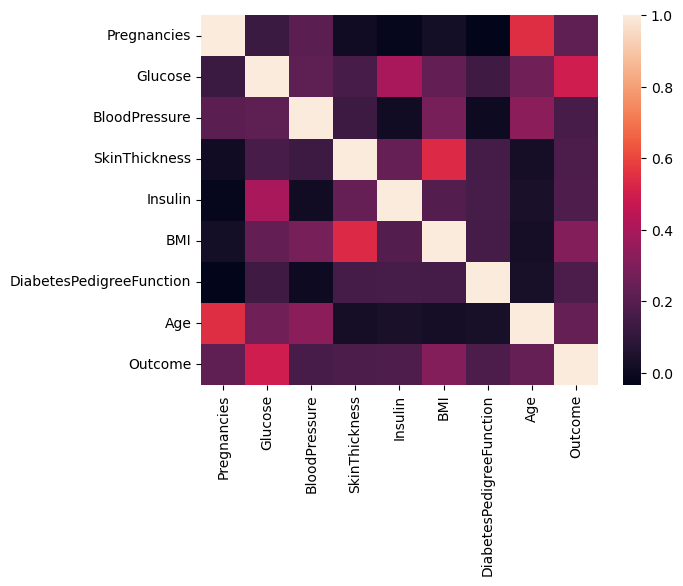

In [20]:
diabetes.corr() 
sns.heatmap(diabetes.corr())

In [21]:
diabetes['Outcome'].shape

(768,)

In [22]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [23]:
y=diabetes['Outcome']
X= diabetes.drop(columns= 'Outcome', axis=1)

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.5)

In [27]:
print(X.shape,x_train.shape,x_test.shape)

(768, 8) (384, 8) (384, 8)


In [28]:
print(y.shape,y_train.shape,y_test.shape)

(768,) (384,) (384,)


In [29]:
model= LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
prediction= model.predict(x_test)
print(prediction)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0]


In [31]:
accuracy= accuracy_score(prediction,y_test)
print(accuracy)

0.796875


In [32]:
import pickle
pickle.dump(model,open('diabetes.pkl','wb'))